In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Ans a. Load the dataset 
df = pd.read_csv('liver_disease_.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [3]:
#Let's observe the shape of the dataframe.
df.shape

(583, 11)

In [4]:
#Remove/replace missing values (if any)
df = df.dropna()
df.shape

(579, 11)

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.Gender.unique())
df['Gender_Encoded'] = le.transform(df.Gender)
df.drop(['Gender'], axis = 1, inplace = True)
le.fit(df.Dataset.unique())
df['Dataset_Encoded'] = le.transform(df.Dataset)
df.drop(['Dataset'], axis = 1, inplace = True)

In [6]:
#Feature Selection
feature_cols = ['Age','Gender_Encoded','Total_Bilirubin',
                'Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase',
                'Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']

X = df[feature_cols]
y = df.Dataset_Encoded

#importing train_test_split
from sklearn.model_selection import train_test_split

#Split the dataset into train and test with stratification
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
#build model
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [8]:
#predict
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0
 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1
 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0]


In [9]:
#confusion matrix
confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))

[[23 22]
 [37 92]]


In [10]:
#Accuracy
print("Accuracy:" , metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6609195402298851


In [11]:
#Precision/Recall/F1
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.38      0.51      0.44        45
           1       0.81      0.71      0.76       129

   micro avg       0.66      0.66      0.66       174
   macro avg       0.60      0.61      0.60       174
weighted avg       0.70      0.66      0.67       174



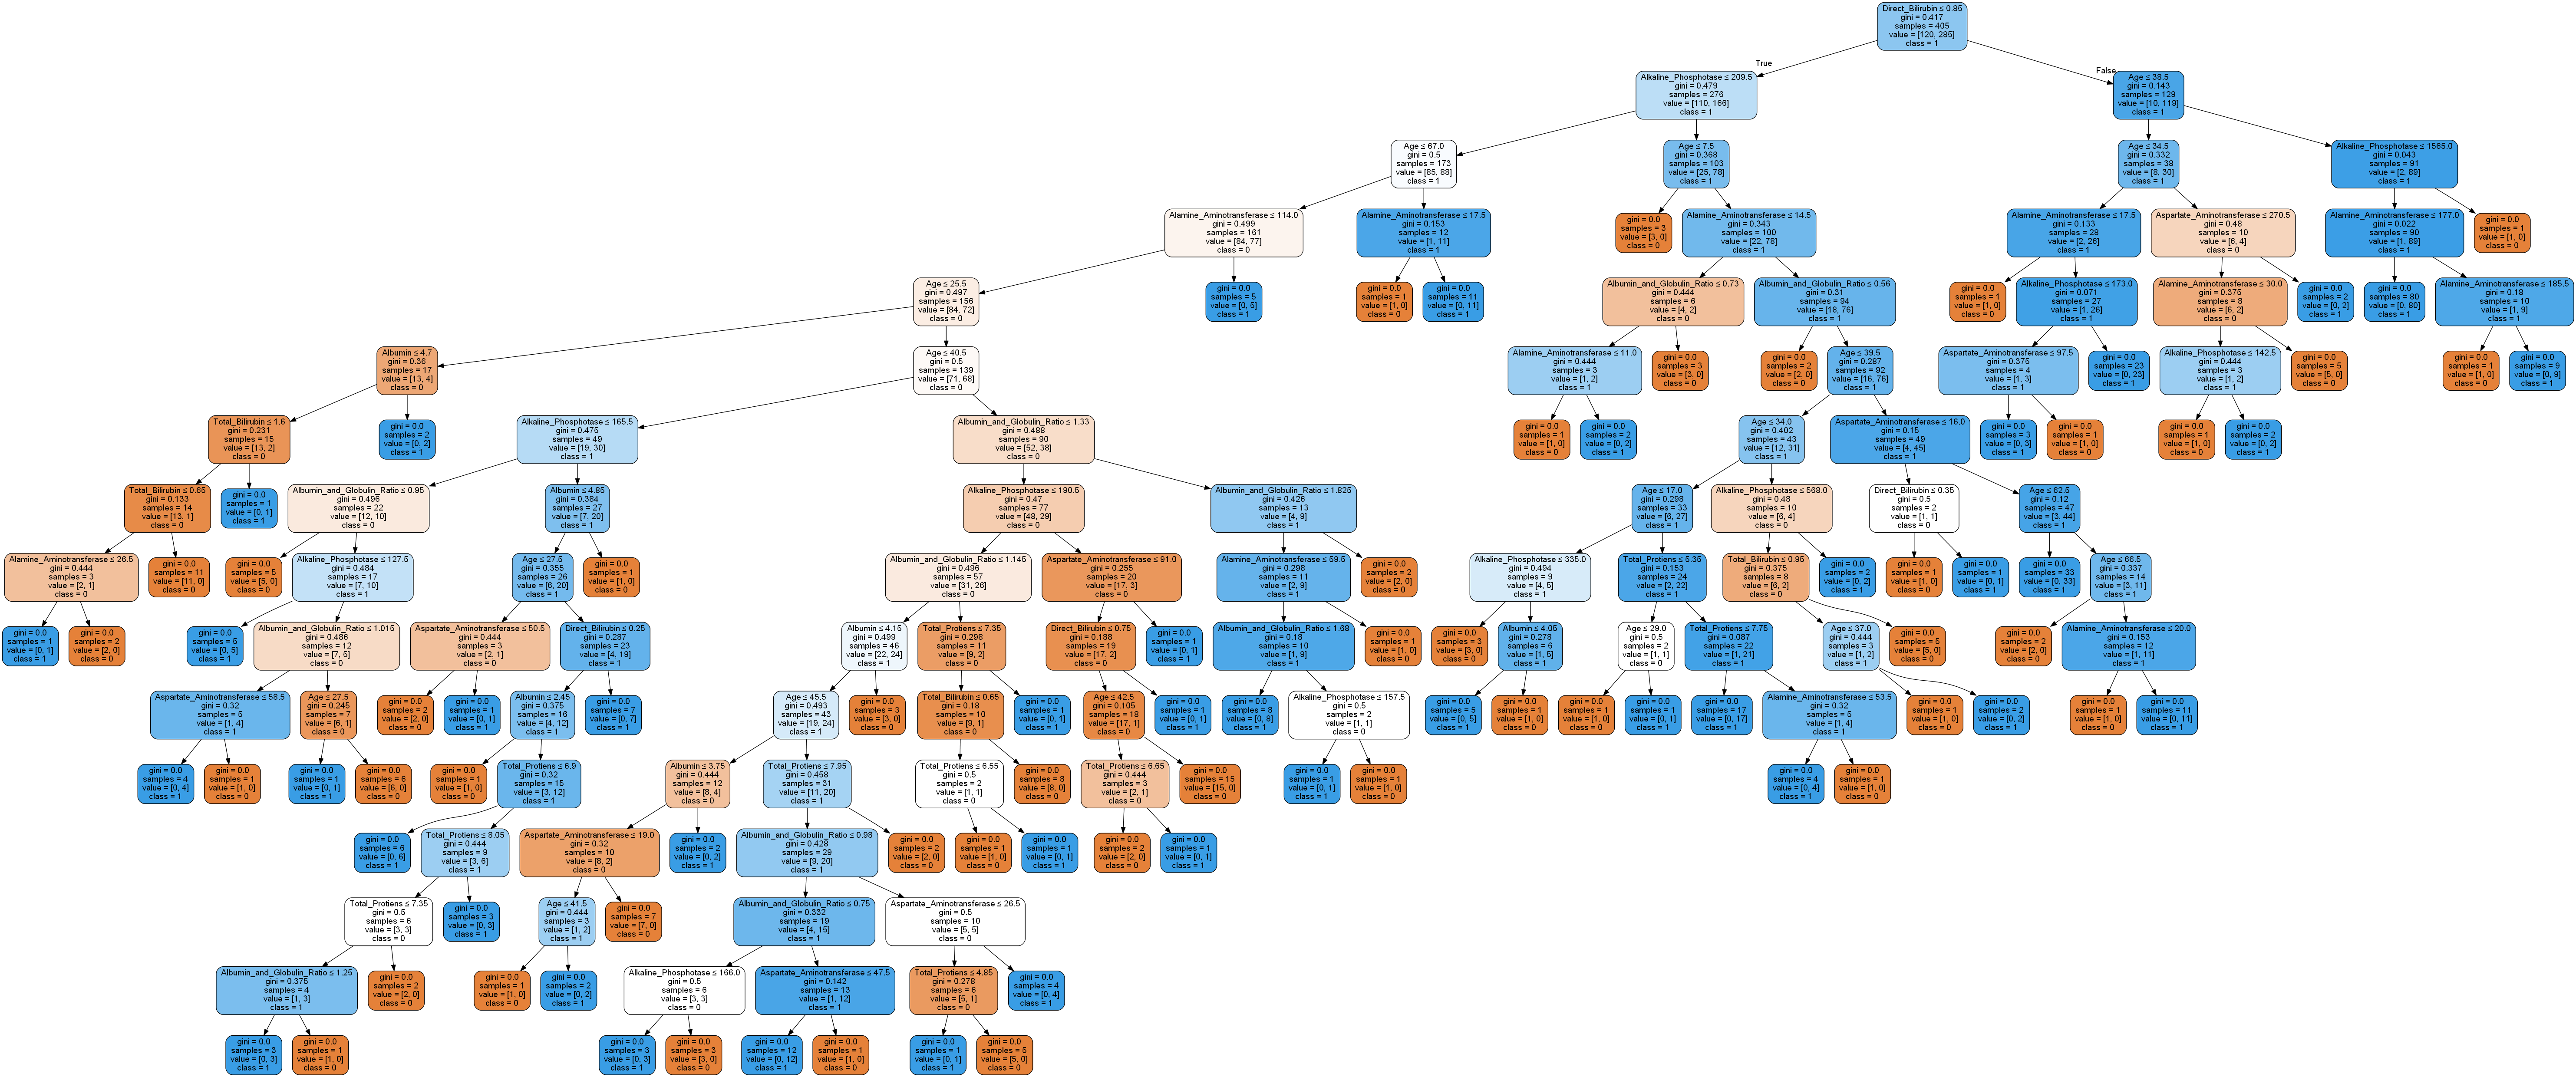

In [12]:
#Print the tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier,out_file=dot_data, 
                filled=True, rounded=True, 
                special_characters=True, feature_names= feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('liver.png')
Image(graph.create_png())

In [24]:
#classifier_prune = DecisionTreeClassifier(criterion = "entropy", splitter = 'best', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
classifier_prune = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
classifier_prune = classifier_prune.fit(X_train,y_train)

In [25]:
#predict
y_pred_prune = classifier_prune.predict(X_test)
print(y_pred_prune)

[1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1
 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1]


In [26]:
#confusion matrix
confusion_matrix(y_test,y_pred_prune)
print(confusion_matrix(y_test,y_pred_prune))

[[27 18]
 [37 92]]


In [27]:
#Accuracy
print("Accuracy:" , metrics.accuracy_score(y_test,y_pred_prune))

Accuracy: 0.6839080459770115


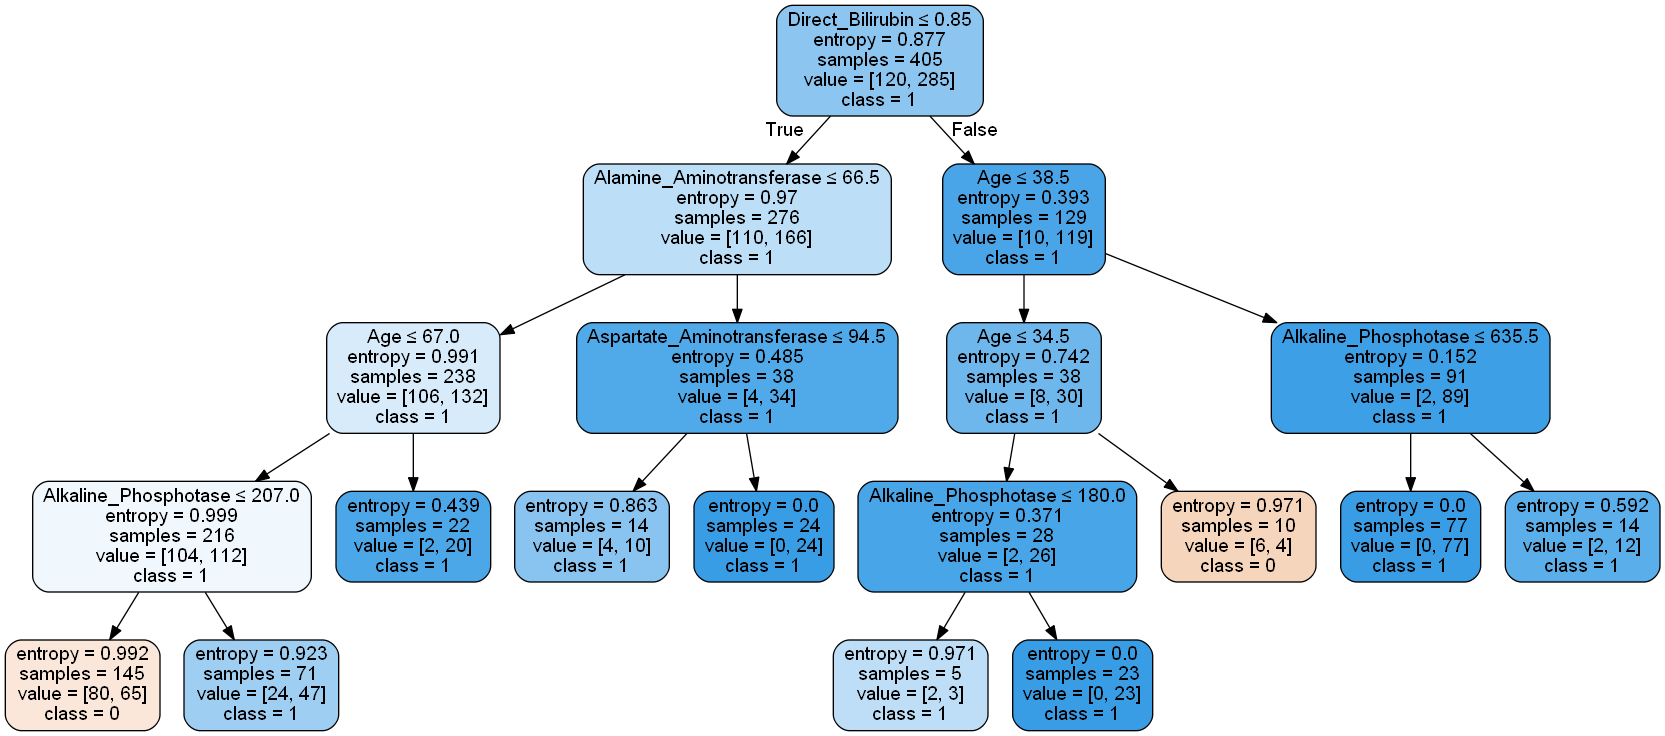

In [28]:
#Print the tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier_prune,out_file=dot_data, 
                filled=True, rounded=True, 
                special_characters=True, feature_names= feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('liver_prune.png')
Image(graph.create_png())